In [17]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt

In [18]:
#    HotMetal	BathWt	    O	        Temp	    BlowDur	    O2SideLance-B	C_%
min_HotMetal=100.000000	
max_HotMetal=183.000000	

min_BathWt=102.400000	
max_BathWt=267.200000	

Min_O=34.000000	
max_O=2010.000000	

Min_Temp=1525.000000	
max_Temp=1766.000000	

min_BlowDur=0.000000	
max_BlowDur=98.280000	

min_O2Side=0.000000	
max_O2Side=3454.700000	

min_C=0.002000
max_C=0.099000

In [19]:
# Load model from pickle file
with open('/Users/patil/OneDrive/Desktop/Model 3 Mon data/model.pkl', 'rb') as f:
    xgb_r = pickle.load(f)

# Load new data
df = pd.read_excel('/Users/patil/OneDrive/Desktop/Model 3 Mon data/Train Data Model.xlsx', sheet_name='Test',index_col=0)
df['HotMetal'] = df['HotMetal'].apply(lambda x: ((x-min_HotMetal)/(max_HotMetal-min_HotMetal))) 
df['BathWt'] = df['BathWt'].apply(lambda x: ((x-min_BathWt)/(max_BathWt-min_BathWt))) 
df['O'] = df['O'].apply(lambda x: ((x-Min_O)/(max_O-Min_O))) 
df['Temp'] = df['Temp'].apply(lambda x: ((x-Min_Temp)/(max_Temp-Min_Temp))) 
df['BlowDur'] = df['BlowDur'].apply(lambda x: ((x-min_BlowDur)/(max_BlowDur-min_BlowDur))) 
df['O2SideLance-B'] = df['O2SideLance-B'].apply(lambda x: ((x-min_O2Side)/(max_O2Side-min_O2Side))) 

X=df.drop('C_%',axis=1)
Y=df['C_%']
# Make predictions on new data
predictions = xgb_r.predict(X)*(max_C-min_C)+min_C

# Print predictions
print(predictions)
df2 = pd.DataFrame({'Actual_C': Y, 'Predicted_C': predictions})
df2

[0.03758793 0.02168108 0.03085358 0.07318241 0.04037454 0.04812514
 0.02453652 0.03357012 0.03380668 0.0885065  0.03692666 0.058945
 0.03287108 0.02580619 0.03057631 0.04804048 0.05173335 0.03592645
 0.0365849 ]


,Actual_C,Predicted_C
Heat,,
23300227,0.038,0.037588
22405357,0.020,0.021681
23300243,0.030,0.030854
23300175,0.075,0.073182
23200140,0.040,0.040375
23200541,0.048,0.048125
23400160,0.023,0.024537
23200196,0.033,0.033570
22405596,0.033,0.033807


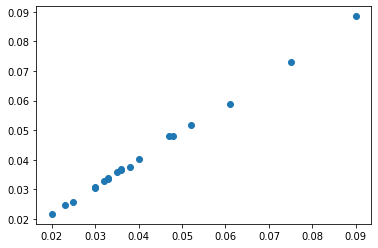

In [20]:
plt.scatter(Y,predictions)